In [2]:
import ssl

import matplotlib.pyplot as plt
import numpy as np
import vaex

ssl_context = ssl._create_unverified_context()

In [3]:
df = vaex.example()
df

#,id,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,0,1.2318684,-0.39692867,-0.59805775,301.15527,174.05948,27.427546,-149431.4,407.38898,333.95554,-1.0053853
1,23,-0.16370061,3.6542213,-0.25490645,-195.00023,170.47217,142.53023,-124247.95,890.24115,684.6676,-1.708667
2,32,-2.120256,3.3260527,1.7078403,-48.63423,171.6473,-2.0794373,-138500.55,372.2411,-202.17618,-1.8336141
3,8,4.715589,4.585251,2.2515438,-232.42084,-294.85083,62.85865,-60037.04,1297.6304,-324.6875,-1.4786882
4,16,7.217187,11.994717,-1.0645622,-1.6891745,181.32935,-11.333611,-83206.84,1332.799,1328.949,-1.8570484
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",21,1.9938701,0.7892761,0.2220599,-216.9299,16.12442,-211.24438,-146457.44,457.72247,203.36758,-1.7451677
"329,996",25,3.7180912,0.7213376,1.6415337,-185.9216,-117.250824,-105.49866,-126627.11,335.00256,-301.837,-0.9822322
"329,997",14,0.36885077,13.029609,-3.6339347,-53.677147,-145.15771,76.7091,-84912.26,817.1376,645.8507,-1.7645613
"329,998",18,-0.112592645,1.4529126,2.1689527,179.30865,205.7971,-68.75873,-133498.47,724.00024,-283.69104,-1.8808953


In [4]:
df.x

Expression = x
Length: 330,000 dtype: float32 (column)
---------------------------------------
     0    1.23187
     1  -0.163701
     2   -2.12026
     3    4.71559
     4    7.21719
       ...       
329995    1.99387
329996    3.71809
329997   0.368851
329998  -0.112593
329999    20.7962

In [5]:
df.x.values

array([ 1.2318684 , -0.16370061, -2.120256  , ...,  0.36885077,
       -0.11259264, 20.79622   ], dtype=float32)

In [6]:
np.sqrt(df.x ** 2 + df.y ** 2 + df.z ** 2)

Expression = sqrt((((x ** 2) + (y ** 2)) + (z ** 2)))
Length: 330,000 dtype: float32 (expression)
-------------------------------------------
     0  1.42574
     1  3.66676
     2  4.29824
     3  6.95203
     4   14.039
      ...      
329995  2.15587
329996  4.12785
329997  13.5319
329998  2.61304
329999  24.3339

In [7]:
df['r'] = np.sqrt(df.x ** 2 + df.y ** 2 + df.z ** 2)
df[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,1.2318684,-0.39692867,-0.59805775,1.4257367
1,-0.16370061,3.6542213,-0.25490645,3.6667573
2,-2.120256,3.3260527,1.7078403,4.298236
3,4.715589,4.585251,2.2515438,6.9520326
4,7.217187,11.994717,-1.0645622,14.039028
...,...,...,...,...
"329,995",1.9938701,0.7892761,0.2220599,2.1558723
"329,996",3.7180912,0.7213376,1.6415337,4.127852
"329,997",0.36885077,13.029609,-3.6339347,13.531897
"329,998",-0.112592645,1.4529126,2.1689527,2.6130419


In [8]:
df.select(df.x < 0)

In [9]:
df.evaluate(df.x, selection=True)

array([-0.16370061, -2.120256  , -7.7843747 , ..., -8.126636  ,
       -3.9477386 , -0.11259264], dtype=float32)

In [10]:
df_neg = df[df.x < 0]
df_neg[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,-0.16370061,3.6542213,-0.25490645,3.6667573
1,-2.120256,3.3260527,1.7078403,4.298236
2,-7.7843747,5.9897747,-0.6826952,9.84581
3,-3.5571861,5.413629,0.09171557,6.478377
4,-20.81394,-3.2946775,13.486608,25.019264
...,...,...,...,...
"166,274",-2.5926425,-2.8716717,-0.18048334,3.8730955
"166,275",-0.7566012,2.9830434,-6.940553,7.592251
"166,276",-8.126636,1.1619766,-1.6459038,8.372658
"166,277",-3.9477386,-3.0684903,-1.5822703,5.2444115


In [11]:
df.count(), df.mean(df.x), df.mean(df.x, selection=True)

(array(330000), array(-0.0632868), array(-5.18457762))

In [13]:
# Group in 64 bins dividing up the range -10 to +10
counts_x = df.count(binby=df.x, limits=[-10, 10], shape=64)
counts_x

array([1374, 1350, 1459, 1618, 1706, 1762, 1852, 2007, 2240, 2340, 2610,
       2840, 3126, 3337, 3570, 3812, 4216, 4434, 4730, 4975, 5332, 5800,
       6162, 6540, 6805, 7261, 7478, 7642, 7839, 8336, 8736, 8279, 8269,
       8824, 8217, 7978, 7541, 7383, 7116, 6836, 6447, 6220, 5864, 5408,
       4881, 4681, 4337, 4015, 3799, 3531, 3320, 3040, 2866, 2629, 2488,
       2244, 1981, 1905, 1734, 1540, 1437, 1378, 1233, 1186])

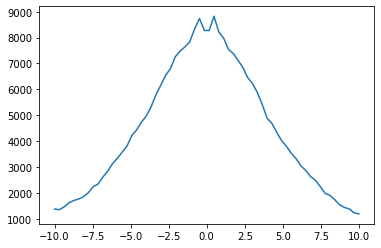

In [15]:
plt.plot(np.linspace(-10, 10, 64), counts_x);

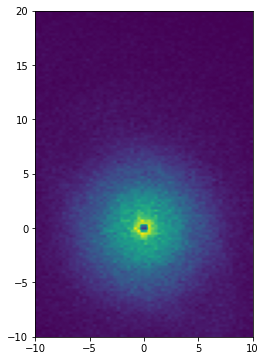

In [18]:
plt.figure(figsize=[12, 6])
xy_counts = df.count(
    binby=[df.x, df.y], limits=[[-10, 10], [-10, 20]], shape=[64, 128])
plt.imshow(xy_counts.T, origin='lower', extent=[-10, 10, -10, 20]);

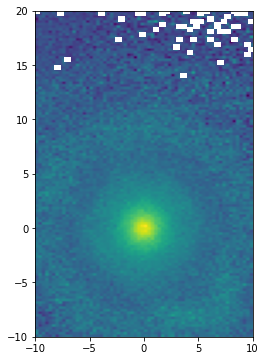

In [21]:
plt.figure(figsize=[12, 6])
v = np.sqrt(df.vx ** 2 + df.vy **2 + df.vz **2)
xy_mean_v = df.mean(
    v,
    binby=[df.x, df.y],
    limits=[[-10, 10], [-10, 20]],
    shape=[64, 128])
plt.imshow(xy_mean_v.T, origin='lower', extent=[-10, 10, -10, 20]);